In [1]:
import sys
import resource

rsrc = resource.RLIMIT_DATA
soft, hard = resource.getrlimit(rsrc)
soft /= 2
resource.setrlimit(rsrc, (soft, hard))

from pathlib  import Path 
import pandas as pd
import geopandas as gpd


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [17, 8]


data_path = Path('./data/raw')

files = {'grid':'trentino-grid.geojson',
         'adm_reg':'administrative_regions_Trentino.json',
        'weather':'meteotrentino-weather-station-data.json',
        'precip':'precipitation-trentino.csv',
        'precip-avail':'precipitation-trentino-data-availability.csv',
        'SET-1':'SET-nov-2013.csv',
        'SET-2':'SET-dec-2013.csv',
        'SET-lines':'line.csv',
        'twitter':'social-pulse-trentino.geojson'}

df_grid = gpd.read_file(data_path / files['grid'])
#df_grid.head()

In [2]:
#df_grid.plot('cellId')

In [3]:
SET1 = pd.read_csv(data_path / files['SET-1'], names=['LINESET','TIMESTAMP','POWER'])
#SET1.head()

In [4]:
SET2 = pd.read_csv(data_path / files['SET-2'], names=['LINESET','TIMESTAMP','POWER'])
#SET2.head()

In [5]:
LINESET = pd.read_csv(data_path / files['SET-lines'])
#LINESET.head()

In [6]:
SET=pd.concat([SET1, SET2])

del SET1
del SET2

In [7]:
data = pd.merge(LINESET,SET,on='LINESET',how='right', sort=False) # con left ci sono dei lineset dove non ci sono dei consumi, uso le chiavi 
                                                                    # del dataset di sinistra 
del SET
del LINESET
#data.head()

In [8]:
#data.isnull().any()

In [9]:
grp = data.groupby(['SQUAREID'], sort = False)
power = grp['POWER'].sum()

max_power = power.max()
highPowerLoc = power > max_power*0.4


In [14]:
map_power = pd.merge(df_grid, power, left_on='cellId',right_on='SQUAREID', how='left')
map_high = pd.merge(df_grid, highPowerLoc, left_on='cellId',right_on='SQUAREID', how='left')


map_high["POWER"].fillna(False, inplace=True)
map_high

cellId                                           geometry  POWER
0         38  POLYGON ((10.91462 45.68201, 10.92746 45.68179...  False
1         39  POLYGON ((10.92746 45.68179, 10.94029 45.68157...  False
2         40  POLYGON ((10.94029 45.68157, 10.95312 45.68136...  False
3        154  POLYGON ((10.90209 45.69122, 10.91493 45.69100...  False
4        155  POLYGON ((10.91493 45.69100, 10.92777 45.69079...  False
...      ...                                                ...    ...
6570   11336  POLYGON ((11.80475 46.52767, 11.81777 46.52735...  False
6571   11337  POLYGON ((11.81777 46.52735, 11.83080 46.52703...  False
6572   11452  POLYGON ((11.79219 46.53698, 11.80521 46.53666...  False
6573   11453  POLYGON ((11.80521 46.53666, 11.81824 46.53634...  False
6574   11454  POLYGON ((11.81824 46.53634, 11.83126 46.53601...  False

[6575 rows x 3 columns]

In [15]:
map_high.plot('POWER') 

Si può notare che la zona più illuminata della regione coincide proprio con la città di Trento, come appunto ci aspettavamo,
attorno alla città di Trento la zona industriale lungo il brennero e poi lungo la strada che porta a Rovereto (individuato sulla
mappa come secondo luogo più illuminato) a più giù Riva del Garda, inoltre una buona illuminazione viene data anche verso la 
Val di Non dove ha sede la grande industria della Melinda 


In [47]:
data["DATE"] = pd.to_datetime(data["TIMESTAMP"])
data["HOUR"] = data["DATE"].dt.hour
#data.head()

In [ ]:
giorno = (data["HOUR"] >= 8) & (data["HOUR"] <  19)
notte = (data["HOUR"] >= 19) & (data["HOUR"] <  24)

data_day = data[giorno]
data_night = data[notte]

In [106]:
grp = data_night.groupby(['SQUAREID'])
power = grp['POWER'].sum()
power.head()

SQUAREID
155     9.553732
272     9.553732
273     9.553732
276    15.025722
277    15.025722
Name: POWER, dtype: float64

In [107]:
map_power = pd.merge(df_grid, power, left_on='cellId',right_on='SQUAREID', how='left') 

/Users/lucabertagno/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


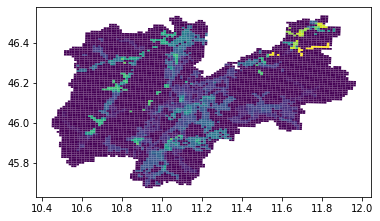

In [108]:
map_power.plot('POWER') 

In [109]:
grp = data_day.groupby(['SQUAREID'])
power = grp['POWER'].sum()
power.head()

SQUAREID
155    17.018105
272    17.018105
273    17.018105
276    22.459103
277    22.459103
Name: POWER, dtype: float64

In [111]:
map_power = pd.merge(df_grid, power, left_on='cellId',right_on='SQUAREID', how='left') 

/Users/lucabertagno/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


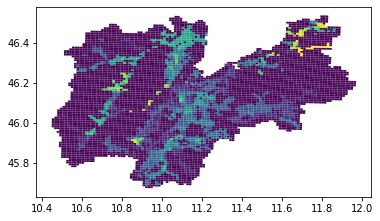

In [112]:
map_power.plot('POWER') 